In [33]:
# data viz taskk 4

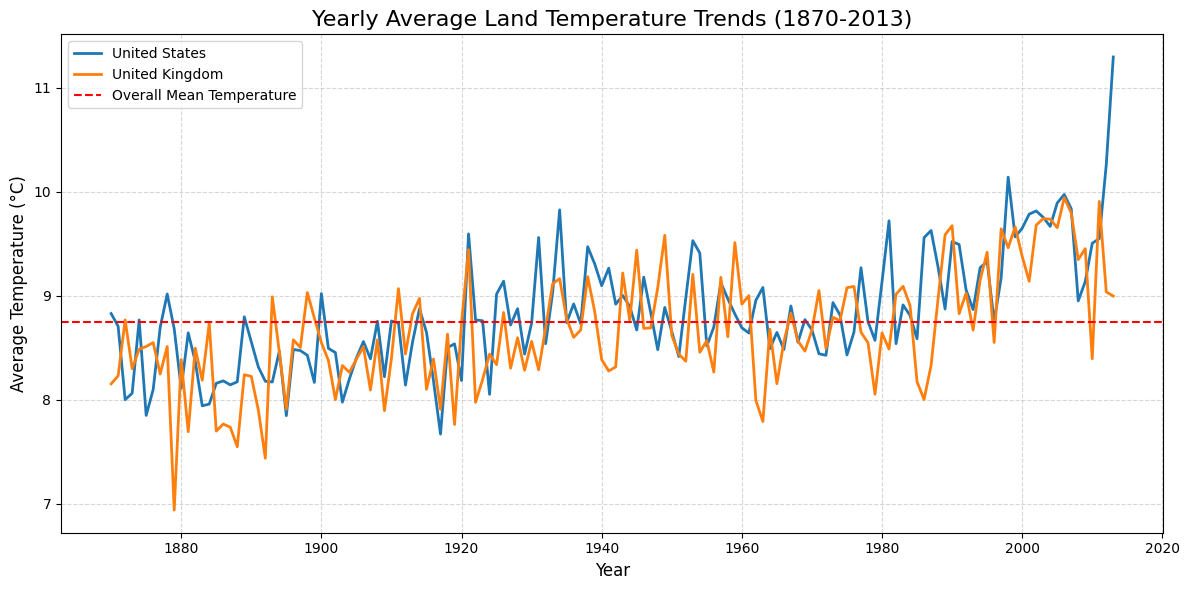

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
country_temp = pd.read_csv(
    '/content/GlobalLandTemperaturesByCountry.csv',
    on_bad_lines='skip',
    low_memory=False
)

# Ensure 'dt' column is converted to datetime
country_temp['dt'] = pd.to_datetime(country_temp['dt'], errors='coerce')

# Filter data for the United States and United Kingdom
us_temp = country_temp[country_temp['Country'] == 'United States'].copy()
uk_temp = country_temp[country_temp['Country'] == 'United Kingdom'].copy()

# Ensure datetime conversion and extract year
us_temp['Year'] = pd.to_datetime(us_temp['dt'], errors='coerce').dt.year
uk_temp['Year'] = pd.to_datetime(uk_temp['dt'], errors='coerce').dt.year

# Combine the two datasets
comparison_countries = pd.concat([us_temp, uk_temp])

# Convert AverageTemperature to numeric and handle invalid values
comparison_countries['AverageTemperature'] = pd.to_numeric(comparison_countries['AverageTemperature'], errors='coerce')

# Filter for years after 1870
comparison_countries_filtered = comparison_countries[comparison_countries['Year'] >= 1870]

# Calculate yearly average temperature for each country
comparison_avg_temp = (
    comparison_countries_filtered.groupby(['Year', 'Country'])['AverageTemperature']
    .mean()
    .reset_index()
)

# Plotting the temperature trends for the United States and United Kingdom
plt.figure(figsize=(12, 6))
for country in ['United States', 'United Kingdom']:
    country_data = comparison_avg_temp[comparison_avg_temp['Country'] == country]
    plt.plot(country_data['Year'], country_data['AverageTemperature'], label=country, linewidth=2)

# Add a horizontal line for average temperature as a reference
plt.axhline(comparison_avg_temp['AverageTemperature'].mean(), color='red', linestyle='--', label='Overall Mean Temperature')

# Adding titles and labels
plt.title("Yearly Average Land Temperature Trends (1870-2013)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


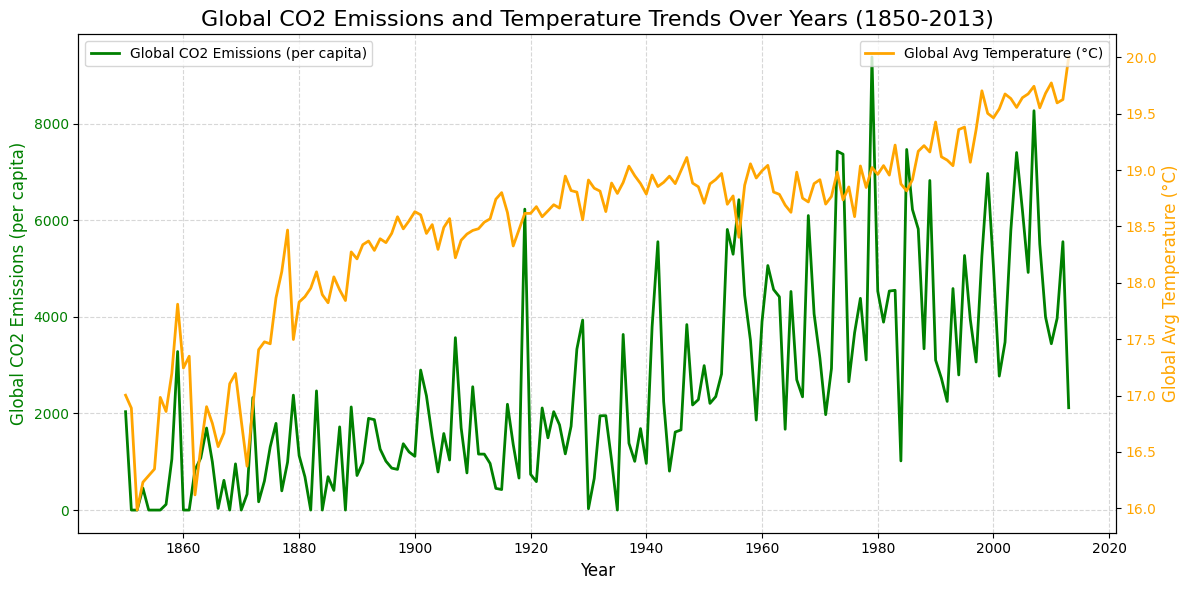

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
ghg_emissions = pd.read_csv('/content/co-emissions-per-capita new.csv')
country_temp = pd.read_csv(
    '/content/GlobalLandTemperaturesByCountry.csv',
    on_bad_lines='skip',
    low_memory=False
)

# Prepare the GHG emissions dataset
ghg_emissions['Annual CO₂ emissions (per capita)'] = pd.to_numeric(
    ghg_emissions['Annual CO₂ emissions (per capita)'], errors='coerce'
)
global_ghg_emissions = ghg_emissions.groupby('Year')['Annual CO₂ emissions (per capita)'].sum().reset_index()
global_ghg_emissions.rename(columns={'Annual CO₂ emissions (per capita)': 'Global CO2 Emissions (per capita)'}, inplace=True)

# Prepare the global temperature dataset
country_temp['AverageTemperature'] = pd.to_numeric(country_temp['AverageTemperature'], errors='coerce')
global_temp_filtered = country_temp[['dt', 'AverageTemperature']].copy()
global_temp_filtered['Year'] = pd.to_datetime(global_temp_filtered['dt'], errors='coerce').dt.year
global_avg_temp = global_temp_filtered.groupby('Year')['AverageTemperature'].mean().reset_index()
global_avg_temp.rename(columns={'AverageTemperature': 'Global Avg Temperature (°C)'}, inplace=True)

# Merge datasets on Year
merged_ghg_temp = pd.merge(global_ghg_emissions, global_avg_temp, left_on='Year', right_on='Year', how='inner')

# Focus on recent timeframe (e.g., 1850 onwards)
merged_ghg_temp_recent = merged_ghg_temp[merged_ghg_temp['Year'] >= 1850]

# Plotting the trends
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot global CO2 emissions on primary y-axis
ax1.plot(merged_ghg_temp_recent['Year'], merged_ghg_temp_recent['Global CO2 Emissions (per capita)'], color='green', label='Global CO2 Emissions (per capita)', linewidth=2)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Global CO2 Emissions (per capita)', fontsize=12, color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a secondary y-axis for global temperature
ax2 = ax1.twinx()
ax2.plot(merged_ghg_temp_recent['Year'], merged_ghg_temp_recent['Global Avg Temperature (°C)'], color='orange', label='Global Avg Temperature (°C)', linewidth=2)
ax2.set_ylabel('Global Avg Temperature (°C)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and grid
plt.title("Global CO2 Emissions and Temperature Trends Over Years (1850-2013)", fontsize=16)
ax1.grid(visible=True, linestyle='--', alpha=0.5)

# Add legends for clarity
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Tight layout for better appearance
fig.tight_layout()

# Show the plot
plt.show()
